# Useful imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Framing the Problem

## Objective

## How should the problem be framed?

## How should performance be measured?

## Is the performance measure aligned with the objective?

# Getting the data

In [2]:
import pandas as pd
import os

TITANIC_PATH='datasets/titanic'

def load_titanic_data(kind, titanic_path=TITANIC_PATH):
    """Loads train or test titanic_data into a pandas Dataframe."""
    csv_path=os.path.join(titanic_path, kind+'.csv')
    return pd.read_csv(csv_path)

titanic_train=load_titanic_data('train')
titanic_test=load_titanic_data('test')

# Exploring the data

## Creating a copy of the data for exploration

In [3]:
train_data=titanic_train.copy()
test_data=titanic_test.copy()

## Studying each attribute and its characteristics

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


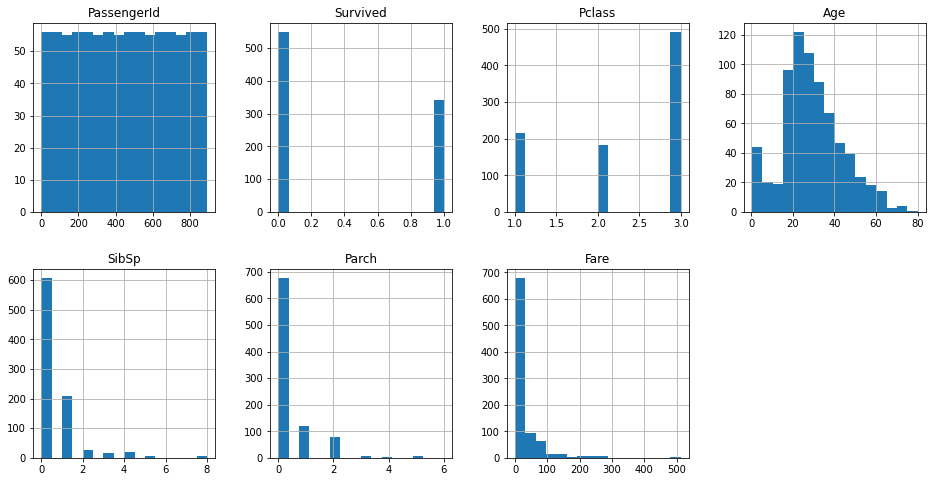

In [7]:
train_data.hist(layout=(2,4), figsize=(16,8), bins=16)
plt.show()

## Identifying the target attribute

In [8]:
train_data['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Visualizing possible correlations between attributes and target and making hypotheses

### Pclass

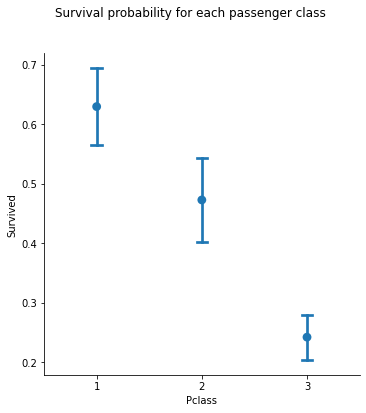

In [9]:
g=sns.catplot(data=train_data, kind='point', x='Pclass', y='Survived',capsize=.1, join=False)
g.fig.suptitle('Survival probability for each passenger class', y=1.1)
plt.show()

### Sex

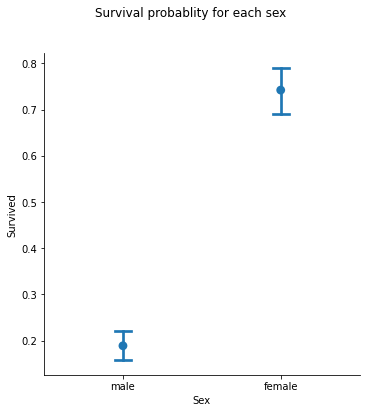

In [10]:
g=sns.catplot(data=train_data, kind='point', x='Sex', y='Survived',capsize=.1, join=False)
g.fig.suptitle('Survival probablity for each sex', y=1.1)
plt.show()

### Pclass and Sex in conjunction

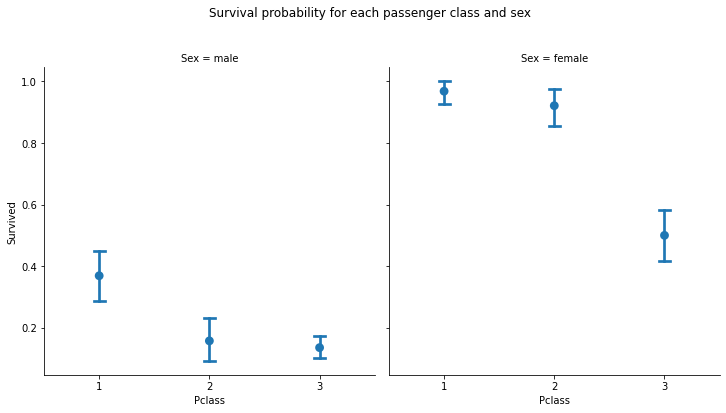

In [11]:
g=sns.catplot(data=train_data, kind='point', x='Pclass', y='Survived',capsize=.1, join=False, col='Sex')
g.fig.suptitle('Survival probability for each passenger class and sex', y=1.1)
plt.show()

### Embarked

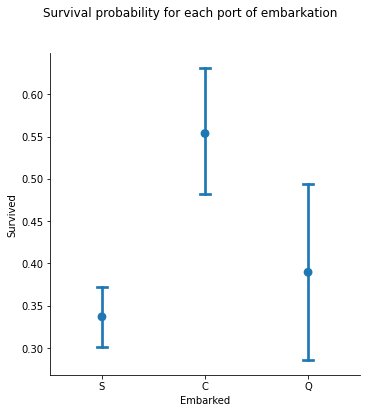

In [12]:
g=sns.catplot(data=train_data, kind='point', x='Embarked', y='Survived',capsize=.1, join=False)
g.fig.suptitle('Survival probability for each port of embarkation', y=1.1)
plt.show()

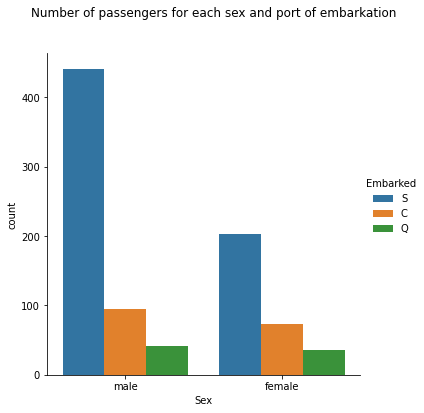

In [13]:
g=sns.catplot(data=train_data, kind='count', x='Sex', hue='Embarked')
g.fig.suptitle('Number of passengers for each sex and port of embarkation', y=1.1)
plt.show()

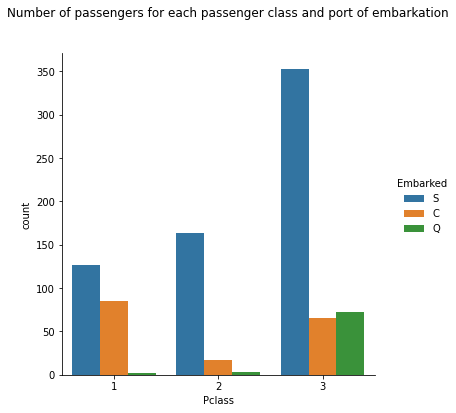

In [14]:
g=sns.catplot(data=train_data, kind='count', x='Pclass', hue='Embarked')
g.fig.suptitle('Number of passengers for each passenger class and port of embarkation', y=1.1)
plt.show()

### Age

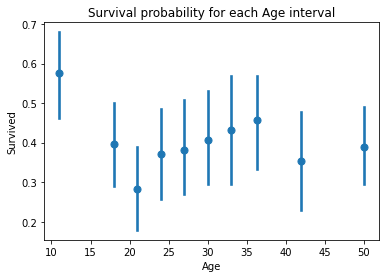

In [15]:
_,ax=plt.subplots()
g=sns.regplot(data=train_data,
            x='Age', y='Survived', ax=ax, x_bins=10, fit_reg=False)
ax.set(title='Survival probability for each Age interval')
plt.show()

### Fare

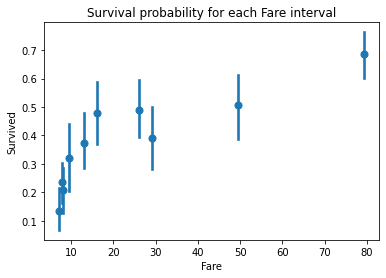

In [16]:
_,ax=plt.subplots()
g=sns.regplot(data=train_data,
            x='Fare', y='Survived', ax=ax, x_bins=10, fit_reg=False)

ax.set(xlabel='Fare', ylabel='Survived', title='Survival probability for each Fare interval')
plt.show()

### Age and Fare in conjunction

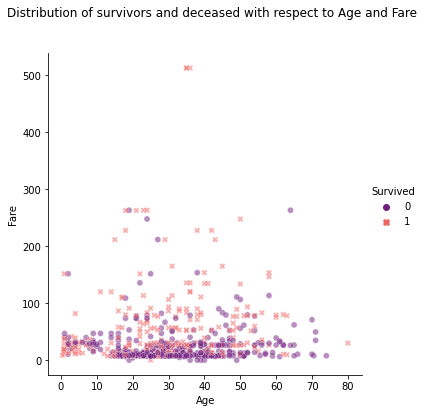

In [17]:
g=sns.relplot(data=train_data,kind='scatter',
            x='Age', y='Fare', hue='Survived', style='Survived', alpha=.5, palette='magma')
g.fig.suptitle('Distribution of survivors and deceased with respect to Age and Fare', y=1.1)
plt.show()

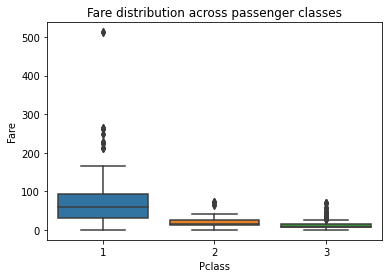

In [18]:
_,ax=plt.subplots()
g=sns.boxplot(data=train_data, x='Pclass', y='Fare', ax=ax)
ax.set(title='Fare distribution across passenger classes')
plt.show()

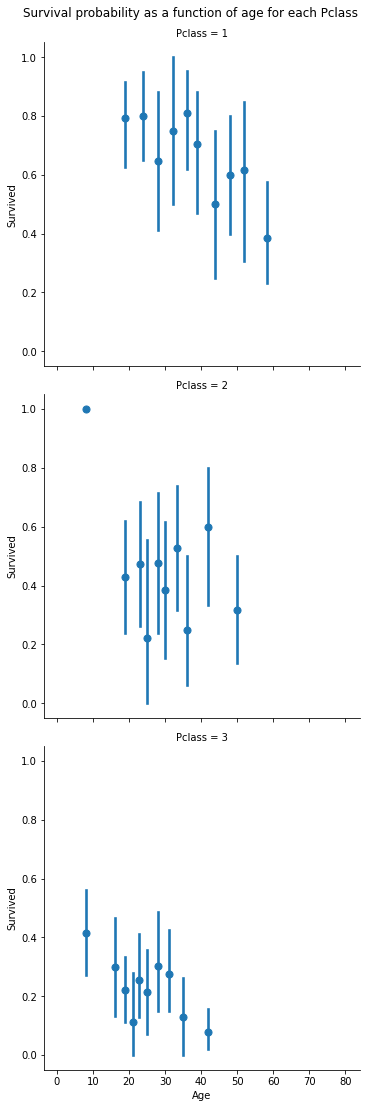

In [19]:
g=sns.lmplot(data=train_data,
            x='Age', y='Survived',fit_reg=False,x_bins=10, row='Pclass')
g.fig.suptitle('Survival probability as a function of age for each Pclass', y=1.01)
plt.show()

### SibSp

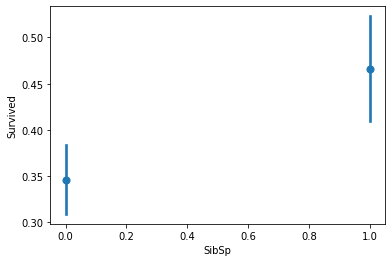

In [20]:
g=sns.regplot(data=train_data,
            x='SibSp', y='Survived', x_bins=10, fit_reg=False)

### Parch

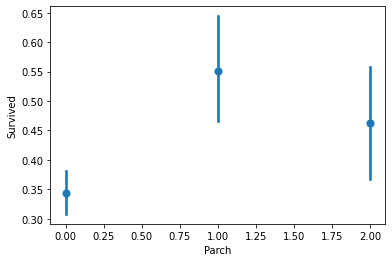

In [21]:
g=sns.regplot(data=train_data,
            x='Parch', y='Survived', x_bins=10, fit_reg=False)

In [22]:
train_data['Relatives']=train_data['SibSp']+train_data['Parch']

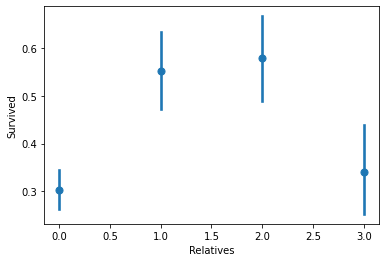

In [23]:
g=sns.regplot(data=train_data,
            x='Relatives', y='Survived', x_bins=10, fit_reg=False)

## Summary of the analysis and promising data transformations

# Preparing the data

## Creating fresh copies of the data

In [24]:
train_data=titanic_train.drop('Survived', axis=1)
train_labels=titanic_train['Survived'].copy()

## Defining classes in order to automate custom transformations

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin

class Custom_transformer(BaseEstimator, TransformerMixin):
    def __init__(self, categorize=False, relatives=True):
        self.categorize=categorize
        self.relatives=relatives
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        if self.relatives:
            X['Relatives']=X['SibSp']+X['Parch']
            if self.categorize:
                X['Relatives']=X['Relatives'].clip(upper=3)
            else:
                pass
        else:
            if self.categorize:
                X['SibSp'].clip(upper=1)
                X['Parch'].clip(upper=2)
            else:
                pass
        return X

## Creating a preprocessing pipeline

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])
    
cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(sparse=False))
    ])

def make_preprocessing_pipeline(categorize=False,relatives=False, embarked=True, fare=True):
    num_attribs=['Age']
    cat_attribs=['Pclass','Sex']
    if embarked:
        cat_attribs.append('Embarked')
    else:
        pass
    if fare:
        num_attribs.append('Fare')
    else:
        pass
    if relatives:
        if categorize:
            cat_attribs.append('Relatives')
        else:
            num_attribs.append('Relatives')
    elif categorize:
        cat_attribs.extend(['SibSp','Parch'])
    else:
        num_attribs.extend(['SibSp','Parch'])
    col_transformer =  ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs)
        ])
    if relatives or categorize:
        preprocessing_pipeline = Pipeline([
            ('custom_transform',Custom_transformer(categorize=categorize,relatives=relatives)),
            ('standar_transform',col_transformer)
        ])
    else:
        preprocessing_pipeline=col_transformer
    return preprocessing_pipeline, num_attribs, cat_attribs
        
preprocessing_pipeline, num_attribs, cat_attribs=make_preprocessing_pipeline()

In [27]:
X_train=preprocessing_pipeline.fit_transform(train_data)

In [28]:
y_train=train_labels

# Short-list promising models

## Functions to evaluate models

In [29]:
from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    """ Calcula as curvas de aprendizado do modelo model, alem de mostrar os erros nos 
    conjuntos de teste e de treino"""
    
    learning=learning_curve(model, X_train, y_train, scoring='accuracy', random_state=1)
    print('training error: '+str(1-np.mean(learning[1][-1])))
    print('validation error: '+str(1-np.mean(learning[2][-1])))
    plt.plot(np.linspace(.1,1,5),1-np.mean(learning[1], axis=1), 'r-', linewidth=2, label='train')
    plt.plot(np.linspace(.1,1,5), 1-np.mean(learning[2], axis=1), 'b-', linewidth=2, label='val')
    plt.xlabel('% training data')
    plt.ylabel('error')
    plt.title('Learning curves')
    plt.figsize=(10,6)
    plt.legend()
    plt.show()
    
def evaluate_model(model):
    """Treina o modelo e plota as curvas de aprendizado, mostra os erros nos conjuntos de teste e treino,
    e plota a matriz de confusão para o modelo"""
    model.fit(X_train, y_train)
    plot_learning_curves(model)
    return model

## Feature importances

In [30]:
from sklearn.ensemble import ExtraTreesClassifier

def feature_importances(X_train, y_train,num_attribs, cat_attribs,cat_classes):
    """Computes feature importances based on an ExtraTrees ensemble and displays the achieved oob score."""
    extra=ExtraTreesClassifier(random_state=2,bootstrap=True, oob_score=True)
    extra.fit(X_train, y_train)
    features=num_attribs+cat_attribs
    split_indexes=list(range(1,len(num_attribs)+1))
    for index in cat_classes[:-1]:
        split_indexes.append(split_indexes[-1]+index)
    feature_importances=[np.sum(x) for x in np.split(extra.feature_importances_,split_indexes)]# due to 1-hot enc
    return (sorted(zip(feature_importances, features), reverse=True),'oob_score='+str(extra.oob_score_))

In [31]:
cat_attribs

['Pclass', 'Sex', 'Embarked']

In [32]:
feature_importances(X_train, y_train,num_attribs, cat_attribs,[3,2,3])

([(0.29963019082245385, 'Sex'),
  (0.23910174642949078, 'Age'),
  (0.21655221055573542, 'Fare'),
  (0.11779774680307736, 'Pclass'),
  (0.04689084967420403, 'Parch'),
  (0.04655842837550834, 'SibSp'),
  (0.033468827339530105, 'Embarked')],
 'oob_score=0.8114478114478114')

In [33]:
preprocessing_pipeline, num_attribs, cat_attribs=make_preprocessing_pipeline(embarked=False)
X_train=preprocessing_pipeline.fit_transform(train_data)

In [34]:
cat_attribs

['Pclass', 'Sex']

In [35]:
feature_importances(X_train, y_train,num_attribs, cat_attribs,[3,2])

([(0.3034162442368462, 'Sex'),
  (0.2530017392333297, 'Fare'),
  (0.23781424578502222, 'Age'),
  (0.11375922768454769, 'Pclass'),
  (0.046268879816239866, 'Parch'),
  (0.045739663244014295, 'SibSp')],
 'oob_score=0.8170594837261503')

In [36]:
preprocessing_pipeline, num_attribs, cat_attribs=make_preprocessing_pipeline(embarked=False, relatives=True )
X_train=preprocessing_pipeline.fit_transform(train_data)

In [37]:
cat_attribs

['Pclass', 'Sex']

In [38]:
feature_importances(X_train, y_train,num_attribs, cat_attribs,[3,2])

([(0.3034487622349143, 'Sex'),
  (0.2637024327490908, 'Fare'),
  (0.2471627800180846, 'Age'),
  (0.11052828775726378, 'Pclass'),
  (0.07515773724064662, 'Relatives')],
 'oob_score=0.8181818181818182')

In [39]:
preprocessing_pipeline, num_attribs, cat_attribs=make_preprocessing_pipeline(embarked=False, relatives=True,\
                                                                             categorize=True)
X_train=preprocessing_pipeline.fit_transform(train_data)

In [40]:
cat_attribs

['Pclass', 'Sex', 'Relatives']

In [41]:
feature_importances(X_train, y_train,num_attribs, cat_attribs,[3,2,4])

([(0.29545253059375326, 'Sex'),
  (0.27131536143206536, 'Fare'),
  (0.2567710853735695, 'Age'),
  (0.12138911266201681, 'Pclass'),
  (0.05507190993859516, 'Relatives')],
 'oob_score=0.8092031425364759')

In [42]:
preprocessing_pipeline, num_attribs, cat_attribs=make_preprocessing_pipeline(embarked=False, relatives=True )
X_train=preprocessing_pipeline.fit_transform(train_data)

## Model tests

### Linear SVM

training error: 0.23286516853932582
validation error: 0.2570020714330551


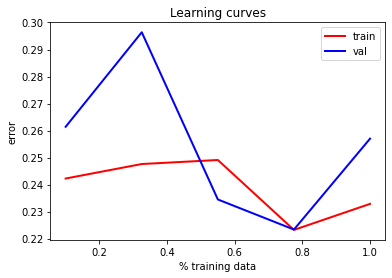

In [43]:
from sklearn.linear_model import SGDClassifier
lin_svm=SGDClassifier(random_state=3)
lin_svm=evaluate_model(lin_svm)

### Logistic regression

training error: 0.22837078651685394
validation error: 0.21998619044629963


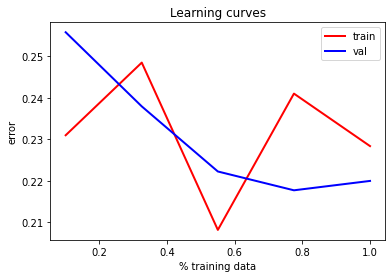

In [44]:
log=SGDClassifier(loss='log', random_state=4)
log=evaluate_model(log)

### Polynomial SVM

training error: 0.17219101123595504
validation error: 0.17845709622748096


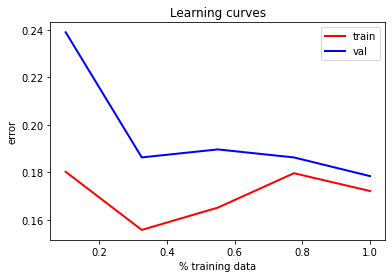

In [45]:
from sklearn.svm import SVC

poly_svm=SVC(random_state=5, kernel='poly')
poly_svm=evaluate_model(poly_svm)

### Gaussian SVM

training error: 0.16741573033707857
validation error: 0.1762099052162449


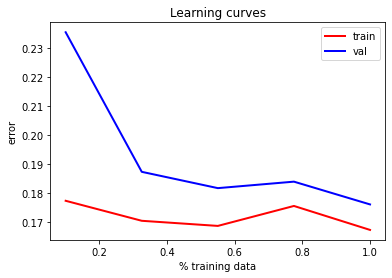

In [92]:
gauss_svm=SVC(random_state=6)
gauss_svm=evaluate_model(gauss_svm)

### ExtraTree

training error: 0.01713483146067407
validation error: 0.226683823990961


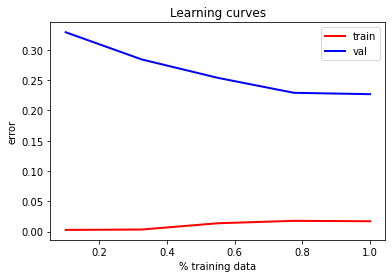

In [87]:
from sklearn.tree import ExtraTreeClassifier

extra=ExtraTreeClassifier(random_state=7)
extra=evaluate_model(extra)

# Fine tuning promising models

## Extra tree

In [88]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

tree_search=RandomizedSearchCV(random_state=8,estimator=extra,\
                               param_distributions={'min_samples_split':randint(2,101),\
                                                   'min_samples_leaf':randint(1,101),\
                                                   'max_leaf_nodes':randint(1,101)},\
                               n_jobs=-1,scoring='accuracy', n_iter=1000)
tree_search.fit(X_train,y_train)
tree_search.best_params_

{'max_leaf_nodes': 48, 'min_samples_leaf': 1, 'min_samples_split': 20}

In [89]:
tree_search.best_score_

0.8058251208335949

training error: 0.1797752808988765
validation error: 0.19417487916640508


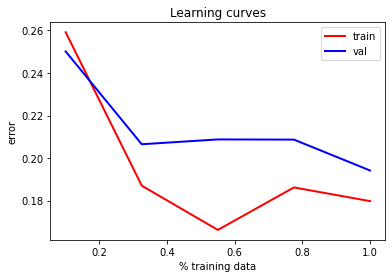

In [90]:
extra=evaluate_model(tree_search.best_estimator_)

## Gaussian SVM

In [93]:
from scipy.stats import loguniform

gauss_search=RandomizedSearchCV(random_state=9,estimator=gauss_svm,\
                               param_distributions={'C':loguniform(1,10)},\
                              n_iter=1000,n_jobs=-1)
gauss_search.fit(X_train, y_train)
gauss_search.best_params_

{'C': 3.175956841785698}

In [94]:
gauss_search.best_score_

0.8305191136777351

training error: 0.16123595505617971
validation error: 0.16948088632226488


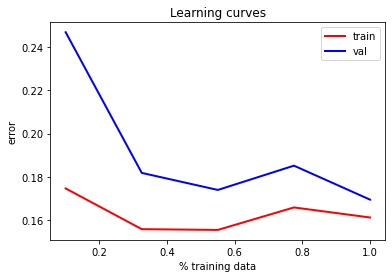

In [95]:
gauss_svm=evaluate_model(gauss_search.best_estimator_)

# Ensembling

## Extra tree

In [106]:
extra_forest=ExtraTreesClassifier(random_state=10,max_leaf_nodes=48,min_samples_split=20,\
                                 oob_score=True, bootstrap=True)

In [107]:
extra_forest.fit(X_train, y_train)
extra_forest.oob_score_

0.8103254769921436

In [109]:
extra_forest.n_estimators=200
extra_forest.fit(X_train, y_train)
extra_forest.oob_score_

0.8103254769921436

## Gaussian SVM

In [110]:
from sklearn.ensemble import AdaBoostClassifier

gauss_svm.probability=True #necessary to perform ada-boost
gauss_svm.fit(X_train,y_train)

ada_gaussian=AdaBoostClassifier(base_estimator=gauss_svm,random_state=11)

training error: 0.3185393258426965
validation error: 0.34902391563618107


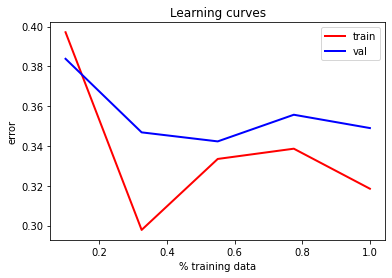

In [111]:
ada_gaussian=evaluate_model(ada_gaussian)

In [112]:
from sklearn.ensemble import BaggingClassifier

gaussian_bag=BaggingClassifier(base_estimator=gauss_svm, n_estimators=100, oob_score=True,\
                              n_jobs=-1, random_state=12)

gaussian_bag.fit(X_train, y_train)
gaussian_bag.oob_score_

0.8237934904601572

# Stacking

training error: 0.1587078651685392
validation error: 0.17956186052350753


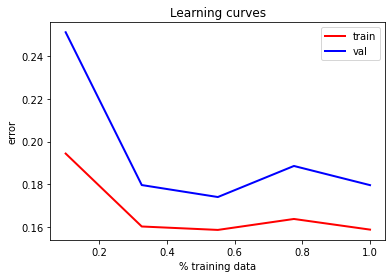

In [113]:
from sklearn.ensemble import StackingClassifier

stack=StackingClassifier(estimators=[('forest', extra_forest), ('gauss', gauss_svm)], n_jobs=-1)

stack=evaluate_model(stack)

# Saving the final model

In [114]:
import joblib

joblib.dump(gauss_svm, 'titanic_model.pkl')

['titanic_model.pkl']

# Submission

In [116]:
X_test=preprocessing_pipeline.transform(test_data)

In [117]:
y_test=gauss_svm.predict(X_test).astype('int64')

In [118]:
titanic_test['Survived']=pd.Series(y_test)

In [119]:
submission_data=pd.DataFrame(titanic_test[['PassengerId', 'Survived']])

In [120]:
submission_data.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [121]:
submission_data.to_csv('submission.csv', index=False)

# Final Remarks

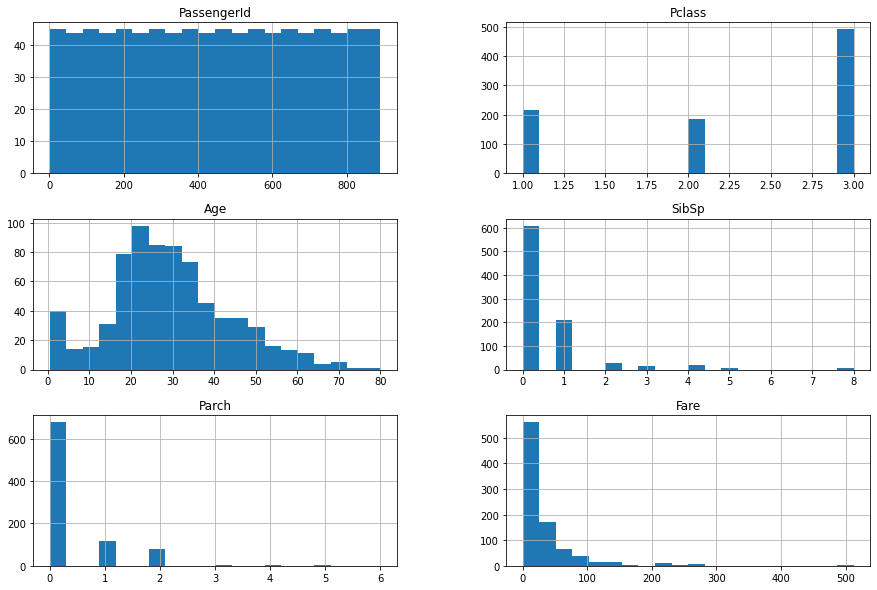

In [126]:
train_data=titanic_train.drop('Survived', axis=1)
test_data=titanic_test.drop('Survived', axis=1)

train_data.hist(bins=20, figsize=(15,10))
plt.show()

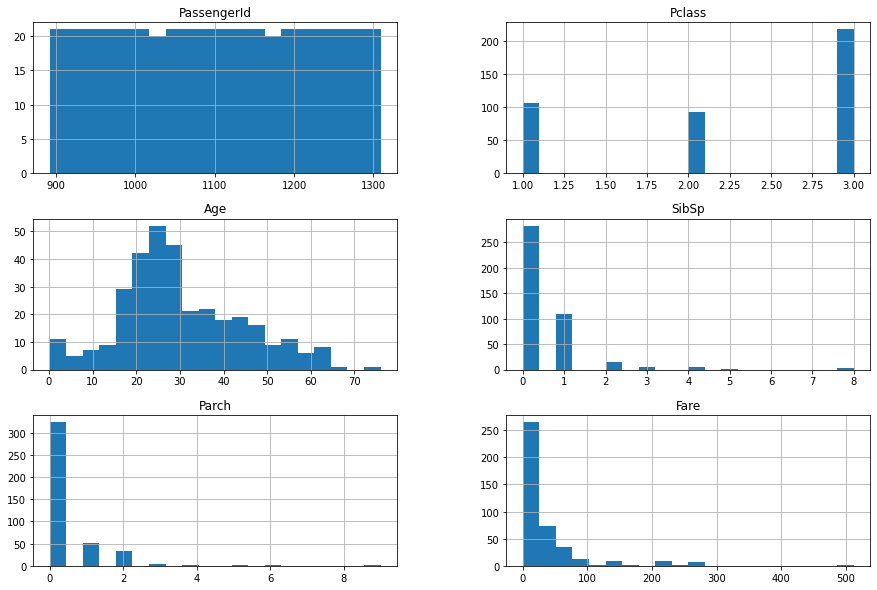

In [127]:
test_data.hist(bins=20, figsize=(15,10))
plt.show()

In [133]:
Custom_transformer(relatives=True).transform(train_data).describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Relatives
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


In [134]:
Custom_transformer(relatives=True).transform(test_data).describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Relatives
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.839713
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,1.519072
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,10.000000
